<a href="https://colab.research.google.com/github/Kuriajm/DS_Core_Week4_IP/blob/main/DS_Core_IP_Wk4_11_2021_Joseph_Mutura_Kuria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

**To work on this project, we will perform the following analysis with Python;** 

1. Find and deal with outliers, anomalies, and missing data within the dataset.

2. Plot appropriate univariate and bivariate summaries recording our observations.

3. Implement the solution by performing hypothesis testing.

4. This will need to be documented when writing the report.

**Importing the Libraries**

In [10]:

#We import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**1. Load the dataset and determine the appropriateness of the data**

In [11]:
#Dataset http://bit.ly/DSCoreAutolibDataset

al_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [12]:
#Checking the first entries of our dataset
al_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [13]:
#Checking the shape of our Dataset

al_df.shape

(16085, 13)

In [14]:
#Checking the information of the dataset to understand it further

al_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


This data looks appropriate for our analysis.

**2. Cleaning the data**

In [15]:
#Checking for null values

al_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no null values.

In [16]:
# Checking for Anomalies
#
al_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

Looks ok with no anomalies

In [18]:
# Dropping the unecessary columns in our dataset
al_df.drop(columns=['n_daily_data_points', 'dayOfWeek','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum' ] , inplace= True, axis = 1)

In [19]:
al_df.head()

,Postal code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,weekday,110,103
1,75001,1/2/2018,weekday,98,94
2,75001,1/3/2018,weekday,138,139
3,75001,1/4/2018,weekday,104,104
4,75001,1/5/2018,weekday,114,117


All unneccessary columns dropped.

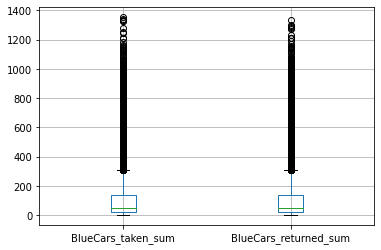

In [20]:
# Checking for Outliers
#Let's start with the Bluecars_taken 
boxplot = al_df.boxplot(column=['BlueCars_taken_sum', 'BlueCars_returned_sum'])

In [22]:
#Removing the outliers using percentile
#Starting with the Bluecars taken sum Column
max_threshold = al_df['BlueCars_taken_sum'].quantile(0.85)
print(max_threshold)
min_threshold = al_df['BlueCars_taken_sum'].quantile(0.15)
print(min_threshold)
al_df2 = al_df[al_df['BlueCars_taken_sum']<= max_threshold]
al_df2 = al_df[al_df['BlueCars_taken_sum']> min_threshold]
print(al_df2.shape)

284.0
12.0
(13621, 5)


In [23]:

#Removing the outliers in the Bluecars returned sum Column
max_threshold1 = al_df2['BlueCars_returned_sum'].quantile(0.85)
print(max_threshold)
min_threshold = al_df2['BlueCars_returned_sum'].quantile(0.15)
print(min_threshold)
al_df3 = al_df2[al_df2['BlueCars_returned_sum']<= max_threshold1]
al_df3 = al_df2[al_df2['BlueCars_returned_sum']> min_threshold]
print(al_df3.shape)

284.0
22.0
(11563, 5)


In [24]:

#Converting datatypes
al_df3['date']= pd.to_datetime(al_df3['date']) 
al_df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Postal code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,2018-01-01,weekday,110,103
1,75001,2018-01-02,weekday,98,94
2,75001,2018-01-03,weekday,138,139
3,75001,2018-01-04,weekday,104,104
4,75001,2018-01-05,weekday,114,117


Our Dataset is now cleaned and ready for analysis.

**3. Univariate analysis**

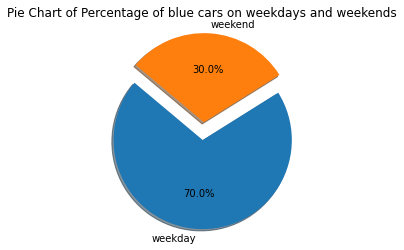

In [26]:
#Pie chart showing percentages of Weekdays and weekends.


plt.pie(al_df3['day_type'].value_counts(normalize=True), labels =al_df3['day_type'].value_counts().index, autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Percentage of blue cars on weekdays and weekends')
plt.show()

We can conclude that weekdays are bussier than weekends in terms of cars taken and returned.

In [28]:
#Lets now sample the data so that we have separete copies of the weekend and weekday data

#Weekend data
al_weekend_df = al_df3[al_df3['day_type'] == 'weekend']
al_weekend_df.reset_index(drop=True, inplace= True)
al_weekend_df.tail(3)

,Postal code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum
3463,95880,2018-06-03,weekend,36,33
3464,95880,2018-06-10,weekend,34,32
3465,95880,2018-06-17,weekend,33,35


In [29]:
#Weekday data
al_weekday_df = al_df3[al_df3['day_type'] == 'weekday']
al_weekday_df.reset_index(drop=True, inplace= True)
al_weekday_df.tail(3)

,Postal code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum
8094,95880,2018-05-08,weekday,31,32
8095,95880,2018-05-21,weekday,26,27
8096,95880,2018-06-12,weekday,25,25


**Measures of central Tendancy**

In [31]:
#Calculate measures of central tendency for weekend
print('Measures of central tendency for weekends: ')
df= al_weekend_df[['BlueCars_returned_sum', 'BlueCars_taken_sum']]
print('Mean is: ')
print(df.mean())
print('Mode is: ')
print(df.mode())
print('Median is: ')
print(df.median())

Measures of central tendency for weekends: 
Mean is: 
BlueCars_returned_sum    195.390364
BlueCars_taken_sum       193.922966
dtype: float64
Mode is: 
   BlueCars_returned_sum  BlueCars_taken_sum
0                     24                  32
Median is: 
BlueCars_returned_sum    87.0
BlueCars_taken_sum       87.0
dtype: float64


In [36]:

#min and max for the weekend were
print('Minimum usage is: ')
print(df.min())
print('Maximum usage was: ')
print(df.max())


Minimum usage is: 
BlueCars_returned_sum    23
BlueCars_taken_sum       13
dtype: int64
Maximum usage was: 
BlueCars_returned_sum    1332
BlueCars_taken_sum       1352
dtype: int64


In [37]:
#quantiles
quantiles = df.quantile([0.25,0.5,0.75])
print(quantiles)

      BlueCars_returned_sum  BlueCars_taken_sum
0.25                   46.0               47.00
0.50                   87.0               87.00
0.75                  252.0              248.75


In [38]:
#Measures of dispersion
print('Skew is: ')
print(df.skew())
print('Kurtosis is: ')
print(df.kurtosis())

Skew is: 
BlueCars_returned_sum    1.941318
BlueCars_taken_sum       1.961413
dtype: float64
Kurtosis is: 
BlueCars_returned_sum    3.429028
BlueCars_taken_sum       3.577920
dtype: float64


**Weekdays**

In [33]:
#Calculate measures of central tendency for weekdays
print('Measures of central tendency for weekdays: ')
df2= al_weekday_df[['BlueCars_returned_sum', 'BlueCars_taken_sum']]
print('Mean is: ')
print(df2.mean())
print('Mode is: ')
print(df2.mode())
print('Median is: ')
print(df2.median())

Measures of central tendency for weekdays: 
Mean is: 
BlueCars_returned_sum    159.834136
BlueCars_taken_sum       160.439669
dtype: float64
Mode is: 
   BlueCars_returned_sum  BlueCars_taken_sum
0                     23                  29
Median is: 
BlueCars_returned_sum    74.0
BlueCars_taken_sum       74.0
dtype: float64


In [39]:
#min and max for the weekdays were
print('Minimum usage is: ')
print(df2.min())
print('Maximum usage was: ')
print(df2.max())

Minimum usage is: 
BlueCars_returned_sum    23
BlueCars_taken_sum       13
dtype: int64
Maximum usage was: 
BlueCars_returned_sum    1056
BlueCars_taken_sum       1093
dtype: int64


In [40]:
#quantiles
quantiles = df2.quantile([0.25,0.5,0.75])
print(quantiles)

      BlueCars_returned_sum  BlueCars_taken_sum
0.25                   39.0                39.0
0.50                   74.0                74.0
0.75                  217.0               219.0


In [45]:
#Measures of dispersion
print('Skew is: ')
print(df2.skew())
print('Kurtosis is: ')
print(df2.kurtosis())

Skew is: 
BlueCars_returned_sum    1.886631
BlueCars_taken_sum       1.883838
dtype: float64
Kurtosis is: 
BlueCars_returned_sum    3.332078
BlueCars_taken_sum       3.337408
dtype: float64


**3. Bivariate Analysis**

Weekend

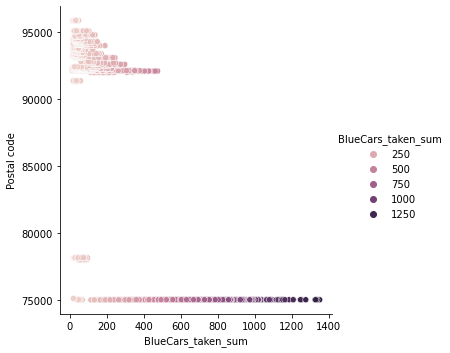

In [50]:
#  Relationship between the postal address to the blue cars taken on weekend
ax = sns.relplot(x="BlueCars_taken_sum", y="Postal code", hue="BlueCars_taken_sum", data=al_weekend_df)

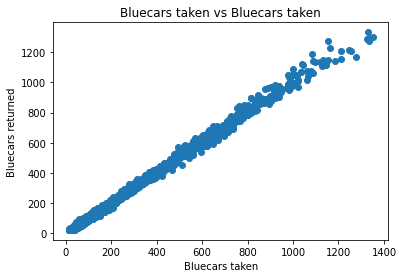

In [42]:
#Plotting scatter plots
plt.scatter(df["BlueCars_taken_sum"] , df["BlueCars_returned_sum"])

# Giving our scatterplot a title
plt.title('Bluecars taken vs Bluecars taken')

# Labelling our x axis
plt.xlabel('Bluecars taken')

# Labelling our y axis
plt.ylabel('Bluecars returned')

# We then display our scatterplot as shown below
plt.show()

There is a direct coreration between Blue cars returned and taken during the weekends

Weekday

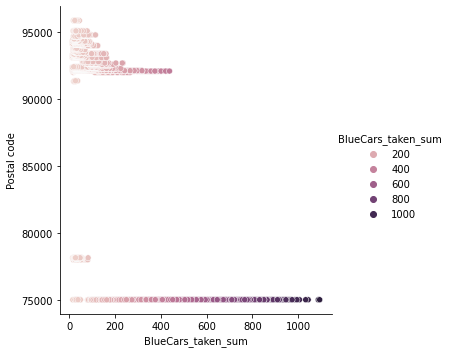

In [51]:
#  Relationship between the postal address to the blue cars taken on weekday
ax = sns.relplot(x="BlueCars_taken_sum", y="Postal code", hue="BlueCars_taken_sum", data=al_weekday_df)

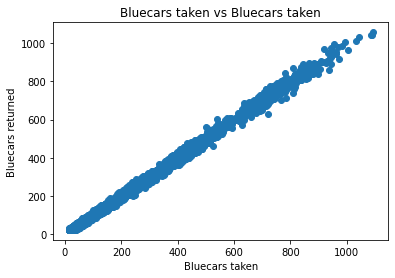

In [46]:
#Plotting scatter plots
plt.scatter(df2["BlueCars_taken_sum"] , df2["BlueCars_returned_sum"])

# Giving our scatterplot a title
plt.title('Bluecars taken vs Bluecars taken')

# Labelling our x axis
plt.xlabel('Bluecars taken')

# Labelling our y axis
plt.ylabel('Bluecars returned')

# We then display our scatterplot as shown below
plt.show()

There is a direct coreration between Blue cars returned and taken during the weekdays

**4. Hypothesis Testing**

**Null and Alternative hypothesis**

Ho: mu₁ = mu₂

H1: mu₁ != mu₂

alpha = 0.05

In [65]:
#Our Samples
df_weekend = df['BlueCars_taken_sum']
df_weekend.head()

0    187
1    180
2    224
3    193
4    217
Name: BlueCars_taken_sum, dtype: int64

In [66]:
df_weekday = df2['BlueCars_taken_sum']
df_weekday.head()

0    110
1     98
2    138
3    104
4    114
Name: BlueCars_taken_sum, dtype: int64

In [69]:
dfwe =df_weekend.sample(n=50,replace="False")
dfwe.shape

(50,)

In [70]:
dfwd =df_weekday.sample(n=50,replace="False")
dfwd.shape

(50,)

In [71]:
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(dfwe, dfwd)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mean of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend (fail to reject H0)')
else:
    print('Mean of bluecars taken during weekdays is different to mean of bluecars taken during the weekend (reject H0)')

Statistics=575.500, p=0.549
Mean of bluecars taken during weekdays is similar to mean of bluecars taken during the weekend (fail to reject H0)


**Results**

There is no significant difference between blue cars hired on weekends and those hired on weekdays. Therefor we fail to reject the null hypothesis.